<a href="https://colab.research.google.com/github/gani88/ForecastingTimeSeries/blob/main/Forecasting_2_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trend
Next thing I learn is about Trend, so what is a Trend ?

In time series, the trend component refers to a gradual and consistent change in the average or mean of a series over an extended period. It captures the overall, long-term direction that a time series is moving in. The trend is an
essential element for understanding the fundamental changes happening in the data.

Characteristics of Trend:

- Persistence: A trend represents changes that persist over a significant period of time. It's not influenced by short-term fluctuations or noise in the data.

- Slow-Moving: Trends evolve slowly compared to other short-term variations in the data. They reflect larger-scale changes that unfold over a longer time frame.

- Long-Term Impact: Trends are relevant at a broader time scale and hold significance over extended periods. They help us grasp the general direction in which a variable is changing.

Example of Trend in Product Sales:

Consider a time series representing the sales of a product over several years. If the sales data exhibits a consistent increase over time, that signifies a positive trend. This upward movement in sales can result from various factors, such as growing awareness of the product, expanding market reach, or increasing demand.

For instance, imagine a company that sells eco-friendly cleaning products. Initially, the sales might be modest, but as environmental consciousness spreads and consumers increasingly seek sustainable alternatives, the product gains popularity. Year by year, the sales figures steadily rise, forming an upward trend in the time series.


Identifying trends in a time series is crucial for various reasons:

- Forecasting: Trends help forecast future values by considering the ongoing direction of the data.

- Decision-Making: Businesses can adapt their strategies based on long-term trends to capture opportunities or mitigate risks.

- Planning: Governments and policymakers can make informed decisions about economic policies based on trends in indicators like GDP or unemployment rates.

In summary, the trend component of a time series encapsulates the gradual, sustained changes in the mean of the series over a considerable time span. Recognizing trends is vital for understanding and predicting the direction of data, making informed decisions, and planning for the future.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Moving Average Plots: Unveiling Trends in Time Series**

In the realm of time series analysis, Moving Average Plots serve as a powerful tool to unravel the underlying trends present within the data. These plots grant us a clearer perspective on the overall behavior of the series, helping to distinguish the long-term directional changes from the shorter-term fluctuations.

**What is a Moving Average?**

The concept of a moving average involves calculating the average of a set of data points within a sliding window of a specified width. The window glides across the time series, capturing groups of adjacent data points. At each position of the window, the average of the data points within the window is computed. This process generates a sequence of average values, with each value corresponding to the center of the window.

**Smoothing Out Short-Term Fluctuations:**

The fundamental purpose of employing a moving average is to smoothen the time series by eliminating or reducing the impact of short-term oscillations and erratic changes. By computing the average of values over a certain window, we effectively soften the abrupt spikes and dips that might be present in the original data. This smoothing process accentuates the long-term patterns and trends that are of greater significance.

**Interpreting the Moving Average Plot**:

In a Moving Average Plot, each point on the graph denotes the average value of the data within the window centered at that particular point. As the window shifts along the time axis, the moving average values adjust accordingly, revealing a smoothed version of the original series.

**Identifying Trends:**

A significant utility of moving average plots is their ability to unveil trends that might not be immediately apparent in the raw time series. If the moving average plot showcases a consistent upward trend, it suggests a long-term increase in the data. Conversely, a relatively constant moving average indicates a stable trend, while oscillations in the moving average might indicate cyclical behavior.

In essence, Moving Average Plots offer a lens through which we can peer into the overarching trajectory of a time series. By systematically removing short-term noise and volatility, these plots provide a clearer view of the trend, allowing us to perceive the broader movement of the data. This understanding of trends can be pivotal for making informed decisions, generating accurate forecasts, and grasping the underlying dynamics of the phenomenon being studied.

**Identifying and Modeling Trends:**

When analyzing time series data, one of the crucial steps is to understand and characterize the trend present in the data. The trend represents the long-term, persistent changes in the data over time. After identifying the shape of the trend, the next step is to create a model that captures this trend. This is where the concept of time-step features comes into play.


---


**Modeling Linear Trends:**

If the identified trend is linear, meaning that the data points follow a roughly straight-line pattern over time, you can model it using a linear equation. A linear trend can be expressed as:


```
target = a * time + b
```

Here, time represents the time step, and a and b are coefficients that linear regression will learn to fit the data. Linear regression aims to find the best-fitting line that minimizes the squared differences between the predicted values and the actual values.


---


**Modeling Quadratic Trends:**

However, trends can take more complex forms than just a straight line. If the trend appears to be quadratic, resembling a parabolic shape, you can extend the model to include a squared term of the time dummy. The equation for modeling a quadratic trend becomes:



```
target = a * time ** 2 + b * time + c
```
Here, in addition to the linear term a * time and the constant term b, you've introduced a quadratic term a * time ** 2. This quadratic term allows the model to capture the curvature present in the data.


---


**Coefficient Learning:**

In both the linear and quadratic cases, linear regression is used to learn the coefficients a, b, and potentially c. During the training process, linear regression finds the values of these coefficients that best fit the data points and minimize the difference between the predicted values and the actual values.

In summary, once you've identified the shape of the trend in your time series data, you can use time-step features to model it. For linear trends, a simple linear equation suffices. For more complex trends like quadratic shapes, you extend the equation to include quadratic terms. Linear regression then learns the appropriate coefficients to fit the chosen model to the data. This process allows you to capture and represent the trend within your time series effectively.


## Example/Implementation
This is based on kaggle learn about Time Series

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True, figsize=(12,6))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="larger",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)

# Dataset Load
tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period()

<ipython-input-3-74c64693fe2c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [29]:
tunnel.head(10)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
2003-11-06,106284
2003-11-07,113111
2003-11-08,96806
2003-11-09,86811


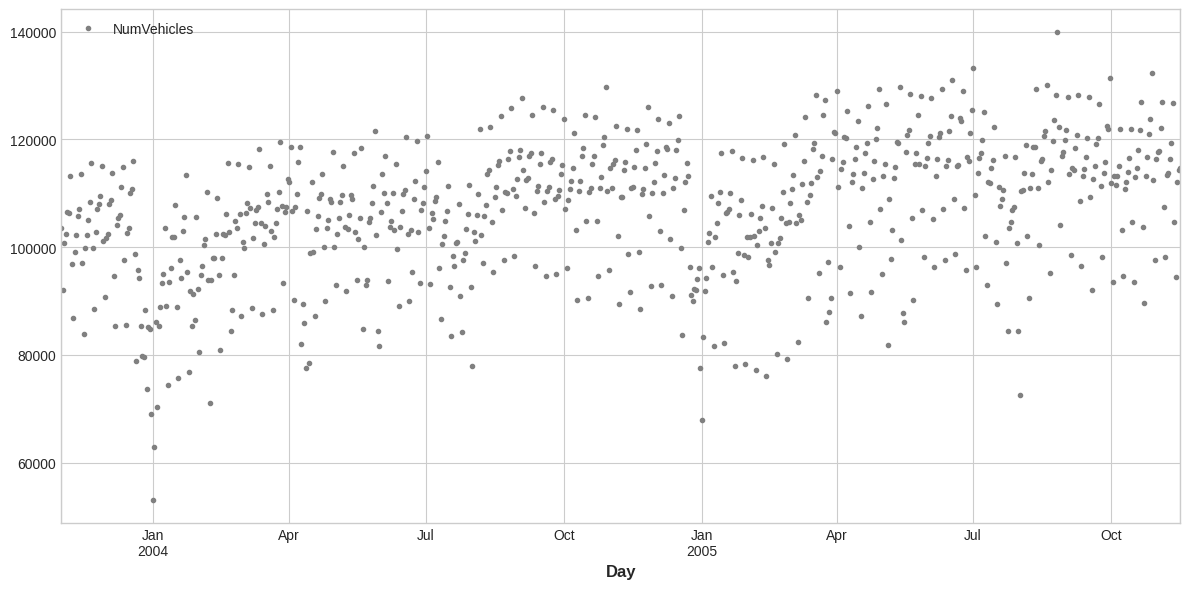

In [10]:
ax = tunnel.plot(style=".", color="0.5")

In this case, the time series has daily observations, meaning that data is collected every day. To get a clearer view of the trend while smoothing over any short-term variations, a window size of 365 days is selected. This means that, for each point in the moving average plot, the average of the previous 365 days' worth of data will be calculated.


---


**Rolling and Averaging:**

To create the moving average plot, a two-step process is used:

**Rolling Method**: The rolling method is applied to initiate a windowed computation. This means that a "window" of a certain size (365 days in this case) moves through the time series, encompassing the specified number of data points within that window at each position.

**Mean Method**: The mean method is then used to calculate the average over the data points within each window. This generates the moving average values.


---

**Interpreting the Moving Average Plot:**

The moving average plot shows the computed average values for each window as it slides through the time series. By smoothing out the data, short-term fluctuations are reduced, allowing you to focus on the broader trend.



---



**Linear Trend Observation:**

In this specific case, after creating the moving average plot using a window size of 365 days, it's observed that the trend of "Tunnel Traffic" appears to be approximately linear. This means that the series exhibits a consistent change over time that resembles a straight-line pattern.

In summary, the process involves creating a moving average plot to understand the trend within a time series. The choice of window size determines the degree of smoothing, and the method of rolling and averaging helps reveal the underlying pattern. In this case, the moving average plot suggests that the trend in "Tunnel Traffic" follows a linear pattern.

<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

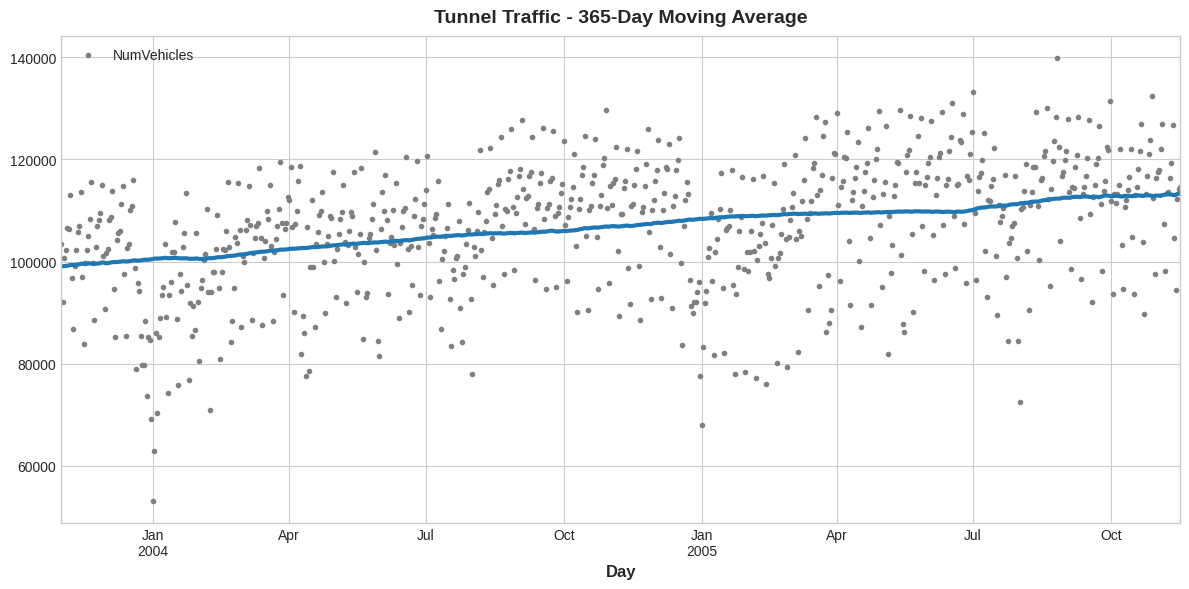

In [25]:
moving_average = tunnel.rolling(
    window=365,
    center=True,
    min_periods=183
).mean()

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False)

**Utilizing DeterministicProcess from statsmodels for Time Series and Linear Regression**

In the realm of time series analysis and linear regression, ensuring accurate and reliable results can be a complex task. To navigate potential challenges and pitfalls that might arise from the combination of time series data and linear regression, a specific tool called DeterministicProcess from the statsmodels library is employed.


---


**Role of DeterministicProcess:**

The DeterministicProcess function serves as a safeguard to tackle potential issues that might arise when working with time series data in combination with linear regression analysis. It's designed to handle certain complexities and edge cases that could otherwise lead to undesirable outcomes.


---


**Polynomial Order and Trend Modeling:**

One key aspect of using DeterministicProcess is the order argument. This argument plays a crucial role in shaping the trend modeling process. Trends in time series data can take on various forms, and often, they can be approximated using polynomial functions. The order argument allows you to specify the degree of the polynomial that best captures the trend's shape.

- For instance, using an order of 1 corresponds to a linear trend. This is suitable when the data appears to follow a straight-line pattern.
- An order of 2 corresponds to a quadratic trend, which can model curves.
- An order of 3 corresponds to a cubic trend, and so on.


---


**Benefit of Using DeterministicProcess:**

By utilizing DeterministicProcess, you're not only benefiting from the convenience of trend modeling with polynomial functions, but you're also mitigating potential complications that can arise when applying linear regression to time series data. The function encapsulates the necessary mechanisms to handle the interplay between time series characteristics and regression analysis, enhancing the reliability and validity of your results.

In summary, the decision to employ DeterministicProcess from the statsmodels library is driven by the desire to ensure accurate and robust results when combining time series data with linear regression analysis. The order argument within this function allows you to specify the polynomial order that best represents the trend shape, making the process of trend modeling more accurate and manageable.

In [26]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,
    order=1,
    drop=True
)

X = dp.in_sample()

In [27]:
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


### Create the model

In [31]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [35]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

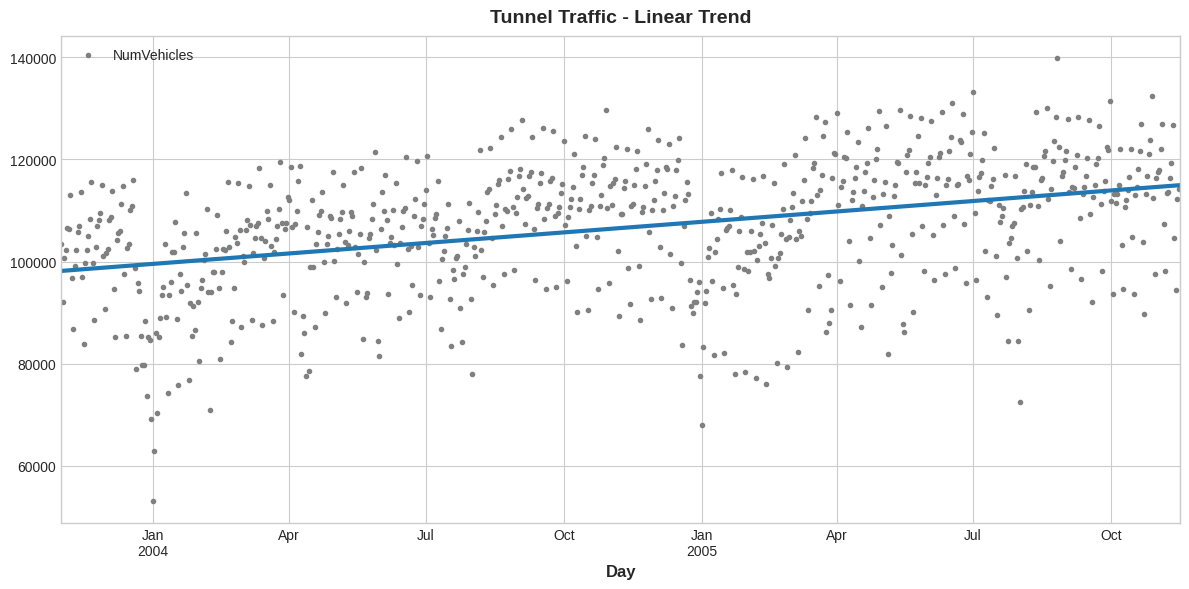

In [36]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [37]:
# This is create forecast for 30Day onward

X = dp.out_of_sample(steps=30)

y_cast = pd.Series(model.predict(X), index=X.index)

In [38]:
y_cast.head(10)

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
2005-11-22    115094.288393
2005-11-23    115116.785843
2005-11-24    115139.283292
2005-11-25    115161.780742
2005-11-26    115184.278191
Freq: D, dtype: float64

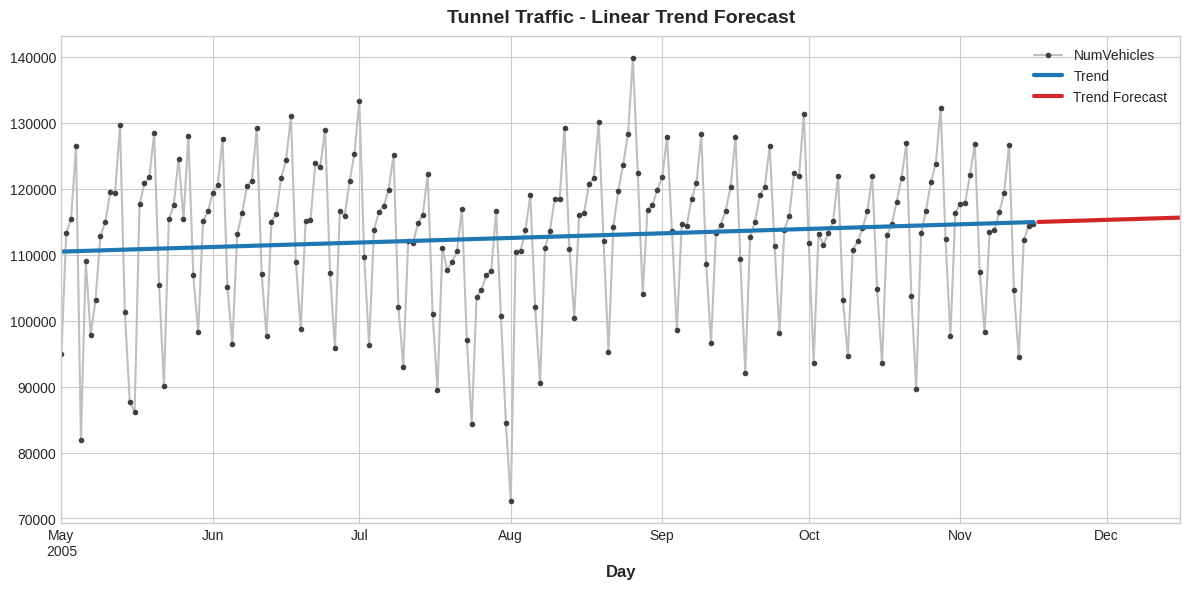

In [39]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_cast.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()